In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns; sns.set(font_scale = 1.2)

#  allow charts to appear in the notebook
%matplotlib inline

In [15]:
recipes = pd.read_csv(r"C:\Users\Sebbie\Downloads\dataset\Machine Learning Tutorial Part 1 _ 2\Cupcakes vs Muffins.csv")
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


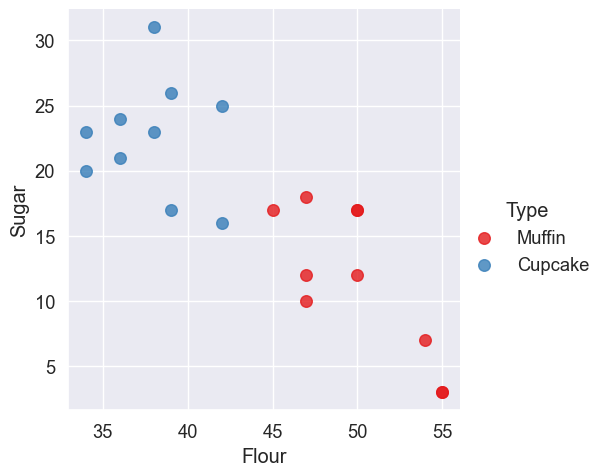

In [25]:
#  what is the difference between muffin and cupcakes
#  plot our data

sns.lmplot(x = "Flour", y = "Sugar", data = recipes, hue = "Type", palette = "Set1", fit_reg = False, scatter_kws = {"s":70})

In [33]:
#  formt / pre process data
# we need type label
type_label = np.where(recipes["Type"] == "Muffin", 0, 1) 
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[["Flour", "Sugar"]].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [34]:
#  fit model 
model = svm.SVC(kernel = "linear")
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [37]:
# get separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]


# plot the parallel to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

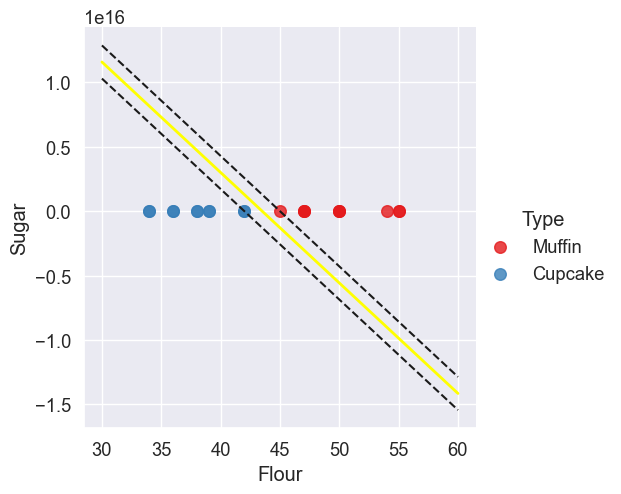

In [42]:

sns.lmplot(x = "Flour", y = "Sugar", data = recipes, hue = "Type", palette = "Set1", fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, linewidth = 2, color = "yellow")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

In [49]:
# create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print("You're looking at a muffin recipe!")
    else:
        print("You're looking at a cupcake recipe!")

muffin_or_cupcake(70, 20)

You're looking at a muffin recipe!


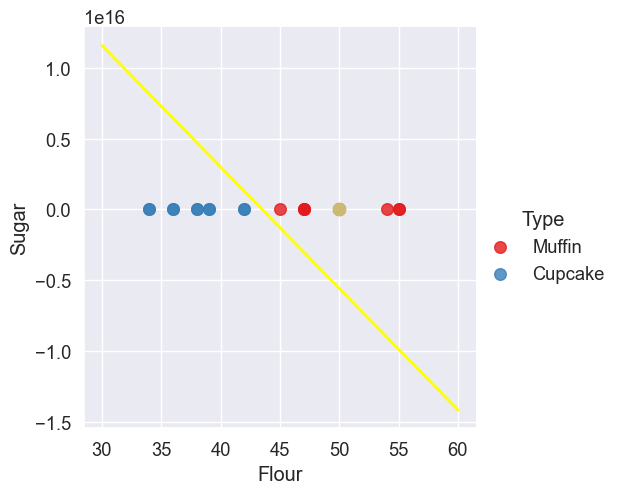

In [52]:
# plot this on the graph
sns.lmplot(x = "Flour", y = "Sugar", data = recipes, hue = "Type", palette = "Set1", fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, linewidth = 2, color = "yellow")
plt.plot(50, 20, "yo", markersize = "9")

In [53]:
# hence i've built a classifier using svm which is able to classsify a recipe is of a cupcake or a muffin